# Kalkulasi Nilai Akhir Menggunakan Data Frame

# Linear Regression 

## Simple Linear Regression

## Multiple Linear Regression

### Try to Data

#### Import Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the data
df = pd.read_excel('Dataset Pertemuan 2.xlsx', sheet_name='Latihan 2')
df.head()

,age,bmi,children,smoker,region,premium
0,37,29.8,2,no,northeast,6406.41
1,25,26.2,0,no,northeast,2721.32
2,52,30.8,1,no,northeast,10797.34
3,23,23.8,0,no,northeast,2395.17
4,60,36.0,0,no,northeast,13228.85


Akan bla bla ....

#### Looking The data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       120 non-null    int64  
 1   bmi       120 non-null    float64
 2   children  120 non-null    int64  
 3   smoker    120 non-null    object 
 4   region    120 non-null    object 
 5   premium   120 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 5.8+ KB


In [12]:
def info_data(df):
    print(f'Jumlah baris: {df.shape[0]}')
    print(f'Jumlah kolom: {df.shape[1]}')
    print(f'Data duplikat: {df.duplicated().sum()}')
    print(f'Jumlah data yang hilang: {df.isnull().sum().sum()}')

In [13]:
info_data(df)

Jumlah baris: 120
Jumlah kolom: 6
Data duplikat: 0
Jumlah data yang hilang: 0


#### Asumption Checking

##### Variabel Dependen Merupakan Variabel Kontinu

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='premium', ylabel='Density'>

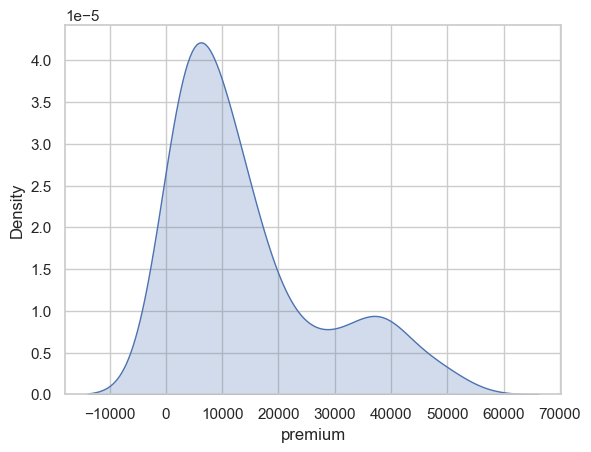

In [34]:
fig, ax = figsize=(15, 25)
sns.set(style='whitegrid')
sns.kdeplot(df['premium'], shade=True)

#### Variabel dependen berdistribusi normal

In [20]:
# checking normality
from scipy.stats import shapiro
from scipy.stats import kstest

def normality_test(data, coloumn_name):
    if len(data[coloumn_name]) < 50:
        stat, p = shapiro(data[coloumn_name])
        print('Shapiro-Wilk Test')
        print(f'Statistics={stat}, p={p}')
        if p > 0.05:
            print('Data terdistribusi normal')
        else:
            print('Data tidak terdistribusi normal')
    else:
        stat, p = kstest(data[coloumn_name], 'norm')
        print('Kolmogorov-Smirnov Test')
        print(f'Statistics={stat}, p={p}')
        if p > 0.05:
            print('Data terdistribusi normal')
        else:
            print('Data tidak terdistribusi normal')



In [21]:
normality_test(df, 'premium')

Kolmogorov-Smirnov Test
Statistics=1.0, p=0.0
Data tidak terdistribusi normal


In [63]:
from scipy import stats

xt, lmbda = stats.boxcox(df['premium'])

In [66]:
df['premium_boxcox'] = xt

In [67]:
normality_test(df, 'premium_boxcox')

Kolmogorov-Smirnov Test
Statistics=0.9999999999999984, p=0.0
Data tidak terdistribusi normal


##### Adanya hubungan linear (linearitas) antara variabel dependen (Y) dengan variabel independen (X)

In [35]:
df.columns

Index(['age', 'bmi', 'children', 'smoker', 'region', 'premium'], dtype='object')

In [62]:
# linearity test
from scipy.stats import pearsonr
y = ['premium']
x = ['age', 'bmi', 'children']
for i in x:
    print(f'Korelasi antara {i} dan {y[0]}')
    print(pearsonr(df[i], df[y[0]]))
    if pearsonr(df[i], df[y[0]])[1] > 0.05:
        print('Data tidak linear')
    else:
        print('Data linear')
    print('')

Korelasi antara age dan premium
PearsonRResult(statistic=0.3269385998663647, pvalue=0.0002677735498469273)
Data linear

Korelasi antara bmi dan premium
PearsonRResult(statistic=0.1950493665346915, pvalue=0.03277379501759468)
Data linear

Korelasi antara children dan premium
PearsonRResult(statistic=0.002816231926469551, pvalue=0.9756464212673374)
Data tidak linear



#### Regression using OLS

# More Interactive Function

In [57]:
import geomeow as meow

In [59]:
dir(meow)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'atriangle_area',
 'circle_area',
 'circle_perimeter',
 'inradius',
 'math',
 'outradius',
 'parallelogram_area',
 'squares_area',
 'striangle_area',
 'tcircle_grad',
 'tcircle_point',
 'trapezoid_area',
 'triangle_area']